In [1]:
from os import chdir
chdir('/Users/lananhnguyen/Desktop/thesis/thesis_code')
import main.packages.unchain_chain as chain
import main.packages.mine_generic as mine_g
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import re
from dieboldmariano import dm_test


In [2]:
date_range = pd.date_range(start=mine_g.train_test_split_date + pd.DateOffset(months=1), end=mine_g.max_X_date, freq='M')
num_model = 9

In [3]:
cat_short = 'food'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]

    for col in [ col for col in forecast_df_h.columns if "ar_1" not in col]:
        print(col)
        print(dm_test(yoy_real_test.iloc[:, 0], forecast_df_h[col], forecast_df_h.loc[:, f'ar_1_{cat_short}_h_{h}'], h = h, harvey_correction=True))


    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]


rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, num_model), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])


prc_food_h_1
(-2.7065611001215824, 0.008250920513030889)
ridge_food_h_1
(-3.0094308339722358, 0.0034654546053128504)
lasso_food_h_1
(2.1616519811538444, 0.033524999921519465)
xgb_food_h_1
(3.1829517818675668, 0.0020523416283307655)
cb_ridge_lasso_food_h_1
(-1.4008697239824552, 0.16498077160680868)
cb_ridge_pcr_food_h_1
(-3.0094308339722358, 0.0034654546053128504)
cb_ridge_prc_lasso_food_h_1
(-2.9019338137830135, 0.004747786001538341)
xgb_pca_food_h_1
(2.9811883746405616, 0.0037670322590124955)
prc_food_h_2
(-1.7290047670529176, 0.08752617908295904)
ridge_food_h_2
(-1.8602140686256778, 0.06639720061275872)
lasso_food_h_2
(-1.3203744346404396, 0.19033956535357)
xgb_food_h_2
(1.7150883210528944, 0.09006038920223385)
cb_ridge_lasso_food_h_2
(-1.7060918300691459, 0.0917304398649722)
cb_ridge_pcr_food_h_2
(-1.8602140686256778, 0.06639720061275872)
cb_ridge_prc_lasso_food_h_2
(-1.8738781419730661, 0.06446609805305625)
xgb_pca_food_h_2
(1.7192046116578932, 0.08930461810857712)
prc_food_h_3
(-1

In [4]:
rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

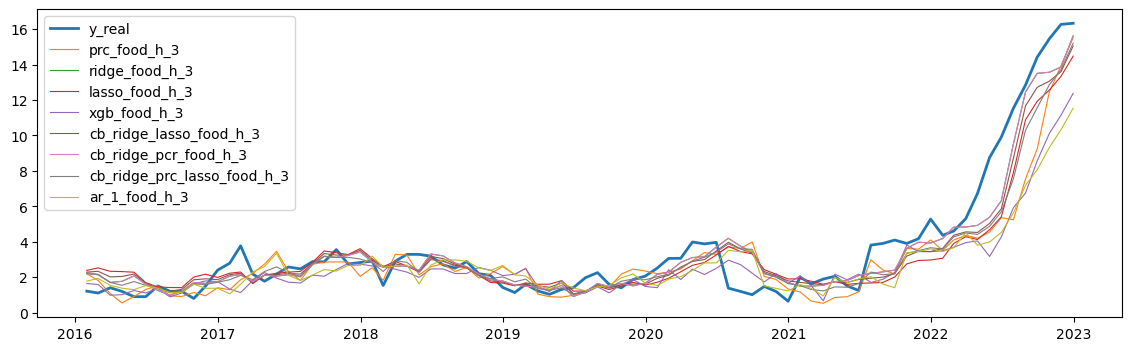

In [5]:
plt.figure(figsize=(14, 4))
plt.plot(yoy_real_test, label = "y_real", linewidth = 2)
for col in forecast_df_h.columns:
    plt.plot(forecast_df_h[col], label = col, linewidth = 0.8)
plt.legend()
plt.show()


In [5]:
rmse

,prc_food,ridge_food,lasso_food,xgb_food,cb_ridge_lasso_food,cb_ridge_pcr_food,cb_ridge_prc_lasso_food,ar_1_food,xgb_pca_food
h_1,0.711664,0.699672,1.002905,1.470230,0.822995,0.699672,0.752819,0.890646,1.210654
h_2,1.152546,0.915097,1.198838,1.943712,1.032324,0.915097,1.024662,1.479376,2.232868
h_3,1.603848,1.058166,1.371531,1.921436,1.196718,1.058166,1.275623,2.004703,1.591551


In [6]:
rmse_comparative = [round(rmse[col]/rmse[f'ar_1_{cat_short}'], 2) for col in rmse.columns]
rmse_comparative

[h_1    0.80
 h_2    0.78
 h_3    0.80
 dtype: float64,
 h_1    0.79
 h_2    0.62
 h_3    0.53
 dtype: float64,
 h_1    1.13
 h_2    0.81
 h_3    0.68
 dtype: float64,
 h_1    1.65
 h_2    1.31
 h_3    0.96
 dtype: float64,
 h_1    0.92
 h_2    0.70
 h_3    0.60
 dtype: float64,
 h_1    0.79
 h_2    0.62
 h_3    0.53
 dtype: float64,
 h_1    0.85
 h_2    0.69
 h_3    0.64
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ar_1_food, dtype: float64,
 h_1    1.36
 h_2    1.51
 h_3    0.79
 dtype: float64]

---------

In [7]:
cat_short = 'energy'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]
    
    for col in [ col for col in forecast_df_h.columns if "ar_1" not in col]:
        print(col)
        print(dm_test(yoy_real_test.iloc[:, 0], forecast_df_h[col], forecast_df_h.loc[:, f'ar_1_{cat_short}_h_{h}'], h = h, harvey_correction=True))



    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]
rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, num_model), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])


prc_energy_h_1
(0.7683464844741423, 0.4444620193577504)
ridge_energy_h_1
(1.5798471865866066, 0.11794553016033804)
lasso_energy_h_1
(1.4648144494973567, 0.1467492623724007)
xgb_energy_h_1
(1.5119501557188073, 0.13434484211212194)
cb_ridge_lasso_energy_h_1
(1.5219435013002742, 0.1318241217831746)
cb_ridge_pcr_energy_h_1
(1.5798471865866066, 0.11794553016033804)
cb_ridge_prc_lasso_energy_h_1
(1.12926013345157, 0.26204131979250844)
xgb_pca_energy_h_1
(2.008380168625459, 0.04785466228683868)
prc_energy_h_2
(0.3933859971691026, 0.695043092596347)
ridge_energy_h_2
(0.8192832150689242, 0.414971169866468)
lasso_energy_h_2
(0.6268626283603961, 0.5324697950440915)
xgb_energy_h_2
(-0.8597000733480634, 0.3924307140773947)
cb_ridge_lasso_energy_h_2
(0.7204027656358197, 0.4733010628993214)
cb_ridge_pcr_energy_h_2
(0.8192832150689242, 0.414971169866468)
cb_ridge_prc_lasso_energy_h_2
(0.49623652549831615, 0.6210391639320829)
xgb_pca_energy_h_2
(1.6895696086318681, 0.09486347670386319)
prc_energy_h_3
(

In [8]:

rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

In [9]:
rmse.columns

Index(['prc_energy', 'ridge_energy', 'lasso_energy', 'xgb_energy',
       'cb_ridge_lasso_energy', 'cb_ridge_pcr_energy',
       'cb_ridge_prc_lasso_energy', 'ar_1_energy', 'xgb_pca_energy'],
      dtype='object')

In [10]:
rmse_comparative = [round(rmse[col]/rmse[f'ar_1_{cat_short}'], 2) for col in rmse.columns]
rmse_comparative

[h_1    1.08
 h_2    1.06
 h_3    1.03
 dtype: float64,
 h_1    1.16
 h_2    1.13
 h_3    1.08
 dtype: float64,
 h_1    1.13
 h_2    1.09
 h_3    1.03
 dtype: float64,
 h_1    1.19
 h_2    0.96
 h_3    0.81
 dtype: float64,
 h_1    1.14
 h_2    1.11
 h_3    1.05
 dtype: float64,
 h_1    1.16
 h_2    1.13
 h_3    1.08
 dtype: float64,
 h_1    1.10
 h_2    1.07
 h_3    1.03
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ar_1_energy, dtype: float64,
 h_1    1.26
 h_2    1.20
 h_3    0.90
 dtype: float64]

--------

In [11]:
cat_short = 'neig'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]
    
    for col in [ col for col in forecast_df_h.columns if "ar_1" not in col]:
        print(col)
        print(dm_test(yoy_real_test.iloc[:, 0], forecast_df_h[col], forecast_df_h.loc[:, f'ar_1_{cat_short}_h_{h}'], h = h, harvey_correction=True))


    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]
rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, num_model), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])


prc_neig_h_1
(-1.9591480760330182, 0.05345275278716076)
ridge_neig_h_1
(-0.5449695659685164, 0.5872358442415202)
lasso_neig_h_1
(2.7036391567751816, 0.008317778132307496)
xgb_neig_h_1
(4.338109255149744, 4.020717454999376e-05)
cb_ridge_lasso_neig_h_1
(1.522504051499294, 0.13168384142664558)
cb_ridge_pcr_neig_h_1
(-0.5449695659685164, 0.5872358442415202)
cb_ridge_prc_lasso_neig_h_1
(0.5763091430320338, 0.5659658102655984)
xgb_pca_neig_h_1
(3.224781353355886, 0.0018037432999785626)
prc_neig_h_2
(-0.08870193155465954, 0.9295324766944838)
ridge_neig_h_2
(-2.390469791819968, 0.019090371155849314)
lasso_neig_h_2
(0.48271037680364187, 0.6305721201216106)
xgb_neig_h_2
(2.1730773618411243, 0.03262481016626032)
cb_ridge_lasso_neig_h_2
(-2.1283013743321253, 0.036277443410941454)
cb_ridge_pcr_neig_h_2
(-2.390469791819968, 0.019090371155849314)
cb_ridge_prc_lasso_neig_h_2
(-2.291399988113349, 0.024474211489326027)
xgb_pca_neig_h_2
(2.053307115322151, 0.043191604522150574)
prc_neig_h_3
(-0.309878449

In [12]:
rmse.columns

Index(['prc_neig', 'ridge_neig', 'lasso_neig', 'xgb_neig',
       'cb_ridge_lasso_neig', 'cb_ridge_pcr_neig', 'cb_ridge_prc_lasso_neig',
       'ar_1_neig', 'xgb_pca_neig'],
      dtype='object')

In [13]:
rmse_comparative = [round(rmse[col]/rmse[f'ar_1_{cat_short}'], 2) for col in rmse.columns]
rmse_comparative

[h_1    0.93
 h_2    0.99
 h_3    0.97
 dtype: float64,
 h_1    0.97
 h_2    0.64
 h_3    0.62
 dtype: float64,
 h_1    1.45
 h_2    1.07
 h_3    0.89
 dtype: float64,
 h_1    2.41
 h_2    1.95
 h_3    1.34
 dtype: float64,
 h_1    1.15
 h_2    0.77
 h_3    0.72
 dtype: float64,
 h_1    0.97
 h_2    0.64
 h_3    0.62
 dtype: float64,
 h_1    1.04
 h_2    0.81
 h_3    0.78
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ar_1_neig, dtype: float64,
 h_1    1.77
 h_2    1.73
 h_3    1.63
 dtype: float64]

In [14]:

rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

-----

In [15]:
cat_short = 'services'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]
    
    for col in [ col for col in forecast_df_h.columns if "ar_1" not in col]:
        print(col)
        print(dm_test(yoy_real_test.iloc[:, 0], forecast_df_h[col], forecast_df_h.loc[:, f'ar_1_{cat_short}_h_{h}'], h = h, harvey_correction=True))

    

    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]
rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, num_model), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])


prc_services_h_1
(-1.458290552609291, 0.14853424750082733)
ridge_services_h_1
(0.17194523946083917, 0.8638991308804861)
lasso_services_h_1
(0.05146265019431854, 0.9590805155139089)
xgb_services_h_1
(1.424082624712276, 0.1581713517334853)
cb_ridge_lasso_services_h_1
(-0.031298035688816554, 0.9751069961682881)
cb_ridge_pcr_services_h_1
(0.17194523946083917, 0.8638991308804861)
cb_ridge_prc_lasso_services_h_1
(-1.6806631415062483, 0.09658825581702568)
xgb_pca_services_h_1
(0.8108736795022162, 0.41975729775877424)
prc_services_h_2
(-0.798835770384153, 0.42666564245557137)
ridge_services_h_2
(-0.5726791204556546, 0.5684101043935578)
lasso_services_h_2
(-0.5796336184310222, 0.5637317745328205)
xgb_services_h_2
(-0.07491200869679633, 0.9404649814351882)
cb_ridge_lasso_services_h_2
(-0.8312927748786626, 0.4081933796487591)
cb_ridge_pcr_services_h_2
(-0.5726791204556546, 0.5684101043935578)
cb_ridge_prc_lasso_services_h_2
(-1.4782531695914223, 0.14312502135756988)
xgb_pca_services_h_2
(-0.15568

In [16]:
rmse.columns

Index(['prc_services', 'ridge_services', 'lasso_services', 'xgb_services',
       'cb_ridge_lasso_services', 'cb_ridge_pcr_services',
       'cb_ridge_prc_lasso_services', 'ar_1_services', 'xgb_pca_services'],
      dtype='object')

In [17]:
rmse_comparative = [round(rmse[col]/rmse[f'ar_1_{cat_short}'], 2) for col in rmse.columns]
rmse_comparative

[h_1    0.92
 h_2    0.94
 h_3    0.90
 dtype: float64,
 h_1    1.01
 h_2    0.94
 h_3    0.83
 dtype: float64,
 h_1    1.00
 h_2    0.95
 h_3    0.84
 dtype: float64,
 h_1    1.10
 h_2    0.99
 h_3    0.83
 dtype: float64,
 h_1    1.00
 h_2    0.93
 h_3    0.82
 dtype: float64,
 h_1    1.01
 h_2    0.94
 h_3    0.83
 dtype: float64,
 h_1    0.93
 h_2    0.88
 h_3    0.80
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ar_1_services, dtype: float64,
 h_1    1.05
 h_2    0.99
 h_3    0.77
 dtype: float64]

In [18]:

rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

-----